# Check YOLO Installation

In [1]:
from IPython import display
import ultralytics

display.clear_output()
ultralytics.checks()

Ultralytics YOLOv8.0.196  Python-3.10.13 torch-2.1.2+cpu CPU (12th Gen Intel Core(TM) i5-1235U)
Setup complete  (12 CPUs, 7.7 GB RAM, 355.4/476.2 GB disk)


# Import Libraries  

In [2]:
from ultralytics import YOLO
import os, random
import glob
from IPython.display import display, Image
import os

current_directory = os.getcwd()

# Import RoboFlow Dataset  

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="MEMemFVlRxs4cviLhLTX")
project = rf.workspace("cv-ukshr").project("car-object-detection-8v1yi")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Car-Object-Detection-2 in yolov8:: 100%|██████████| 1686/1686 [00:01<00:00, 1649.39it/s]


In [4]:
dataset.location

'C:\\Users\\josec\\Documents\\cuenca_lerma_cv\\lab\\Car-Object-Detection-2'

# Train YOLOv8s on RoboFlow Dataset

In [5]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=2 imgsz=800 plots=True

New https://pypi.org/project/ultralytics/8.1.1 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.10.13 torch-2.1.2+cpu CPU (12th Gen Intel Core(TM) i5-1235U)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:\Users\josec\Documents\cuenca_lerma_cv\lab\Car-Object-Detection-2/data.yaml, epochs=2, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=Fal

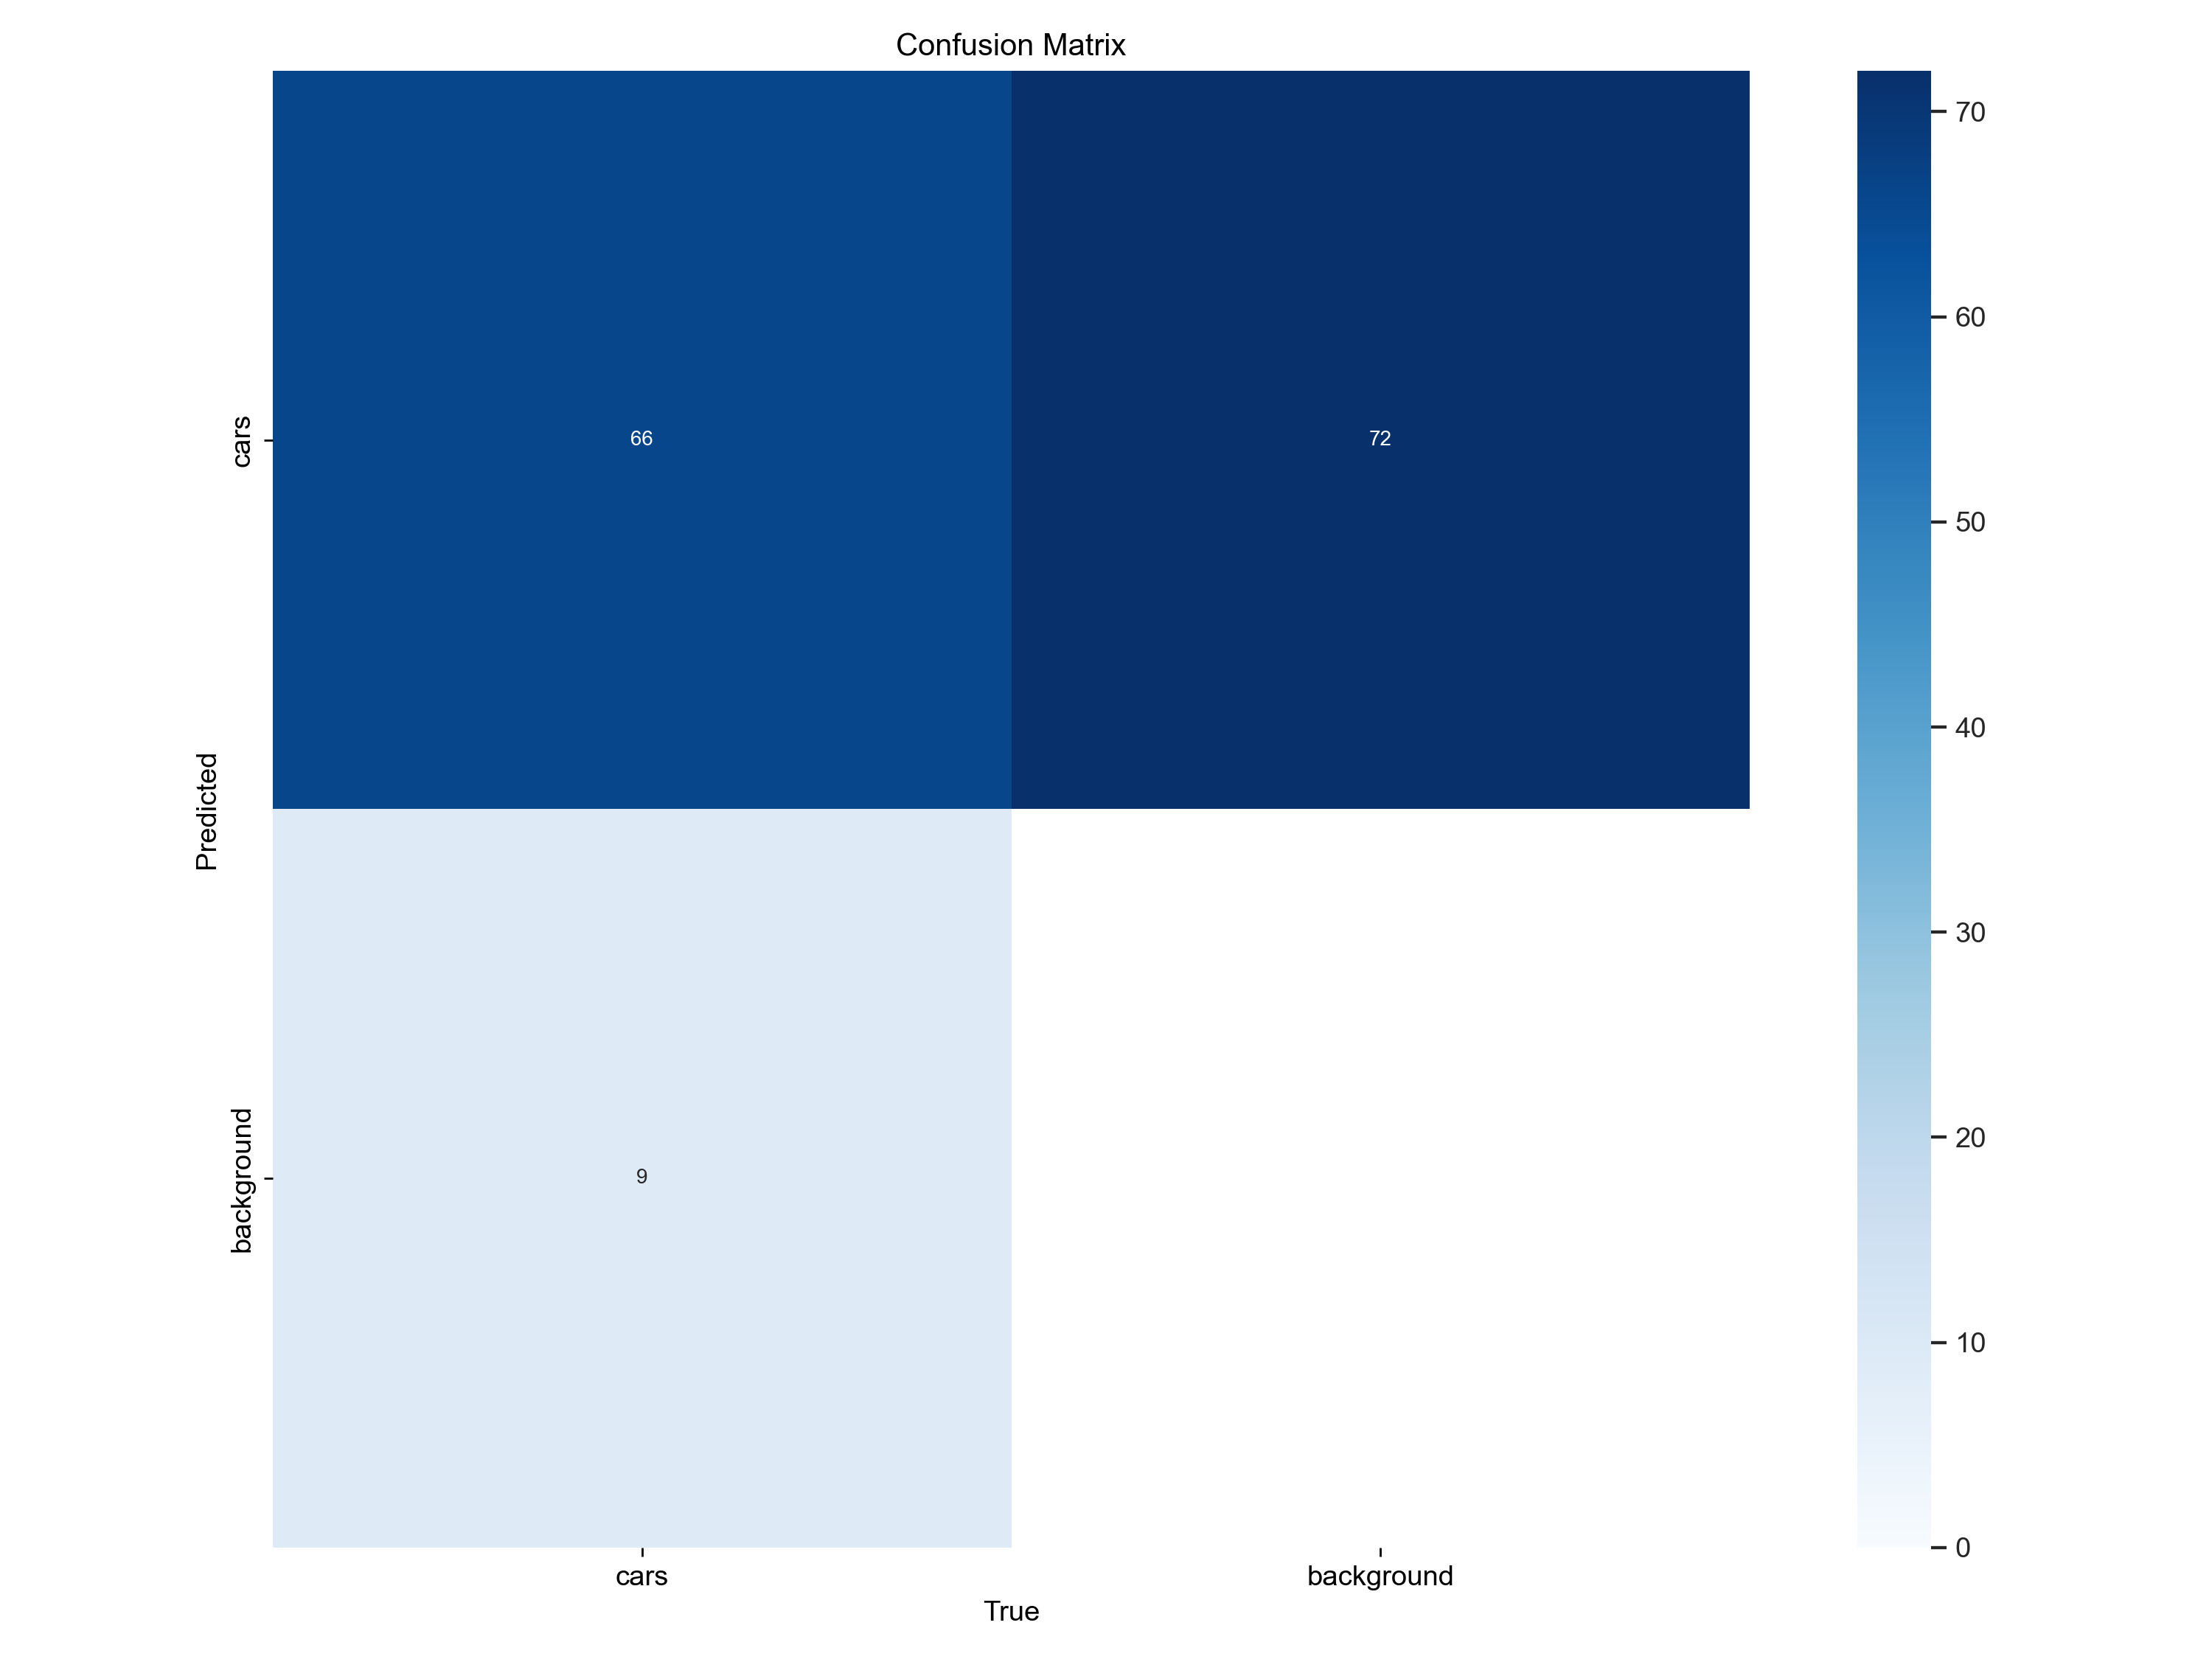

In [6]:
Image(filename=f'runs/detect/train/confusion_matrix.png', width=600)

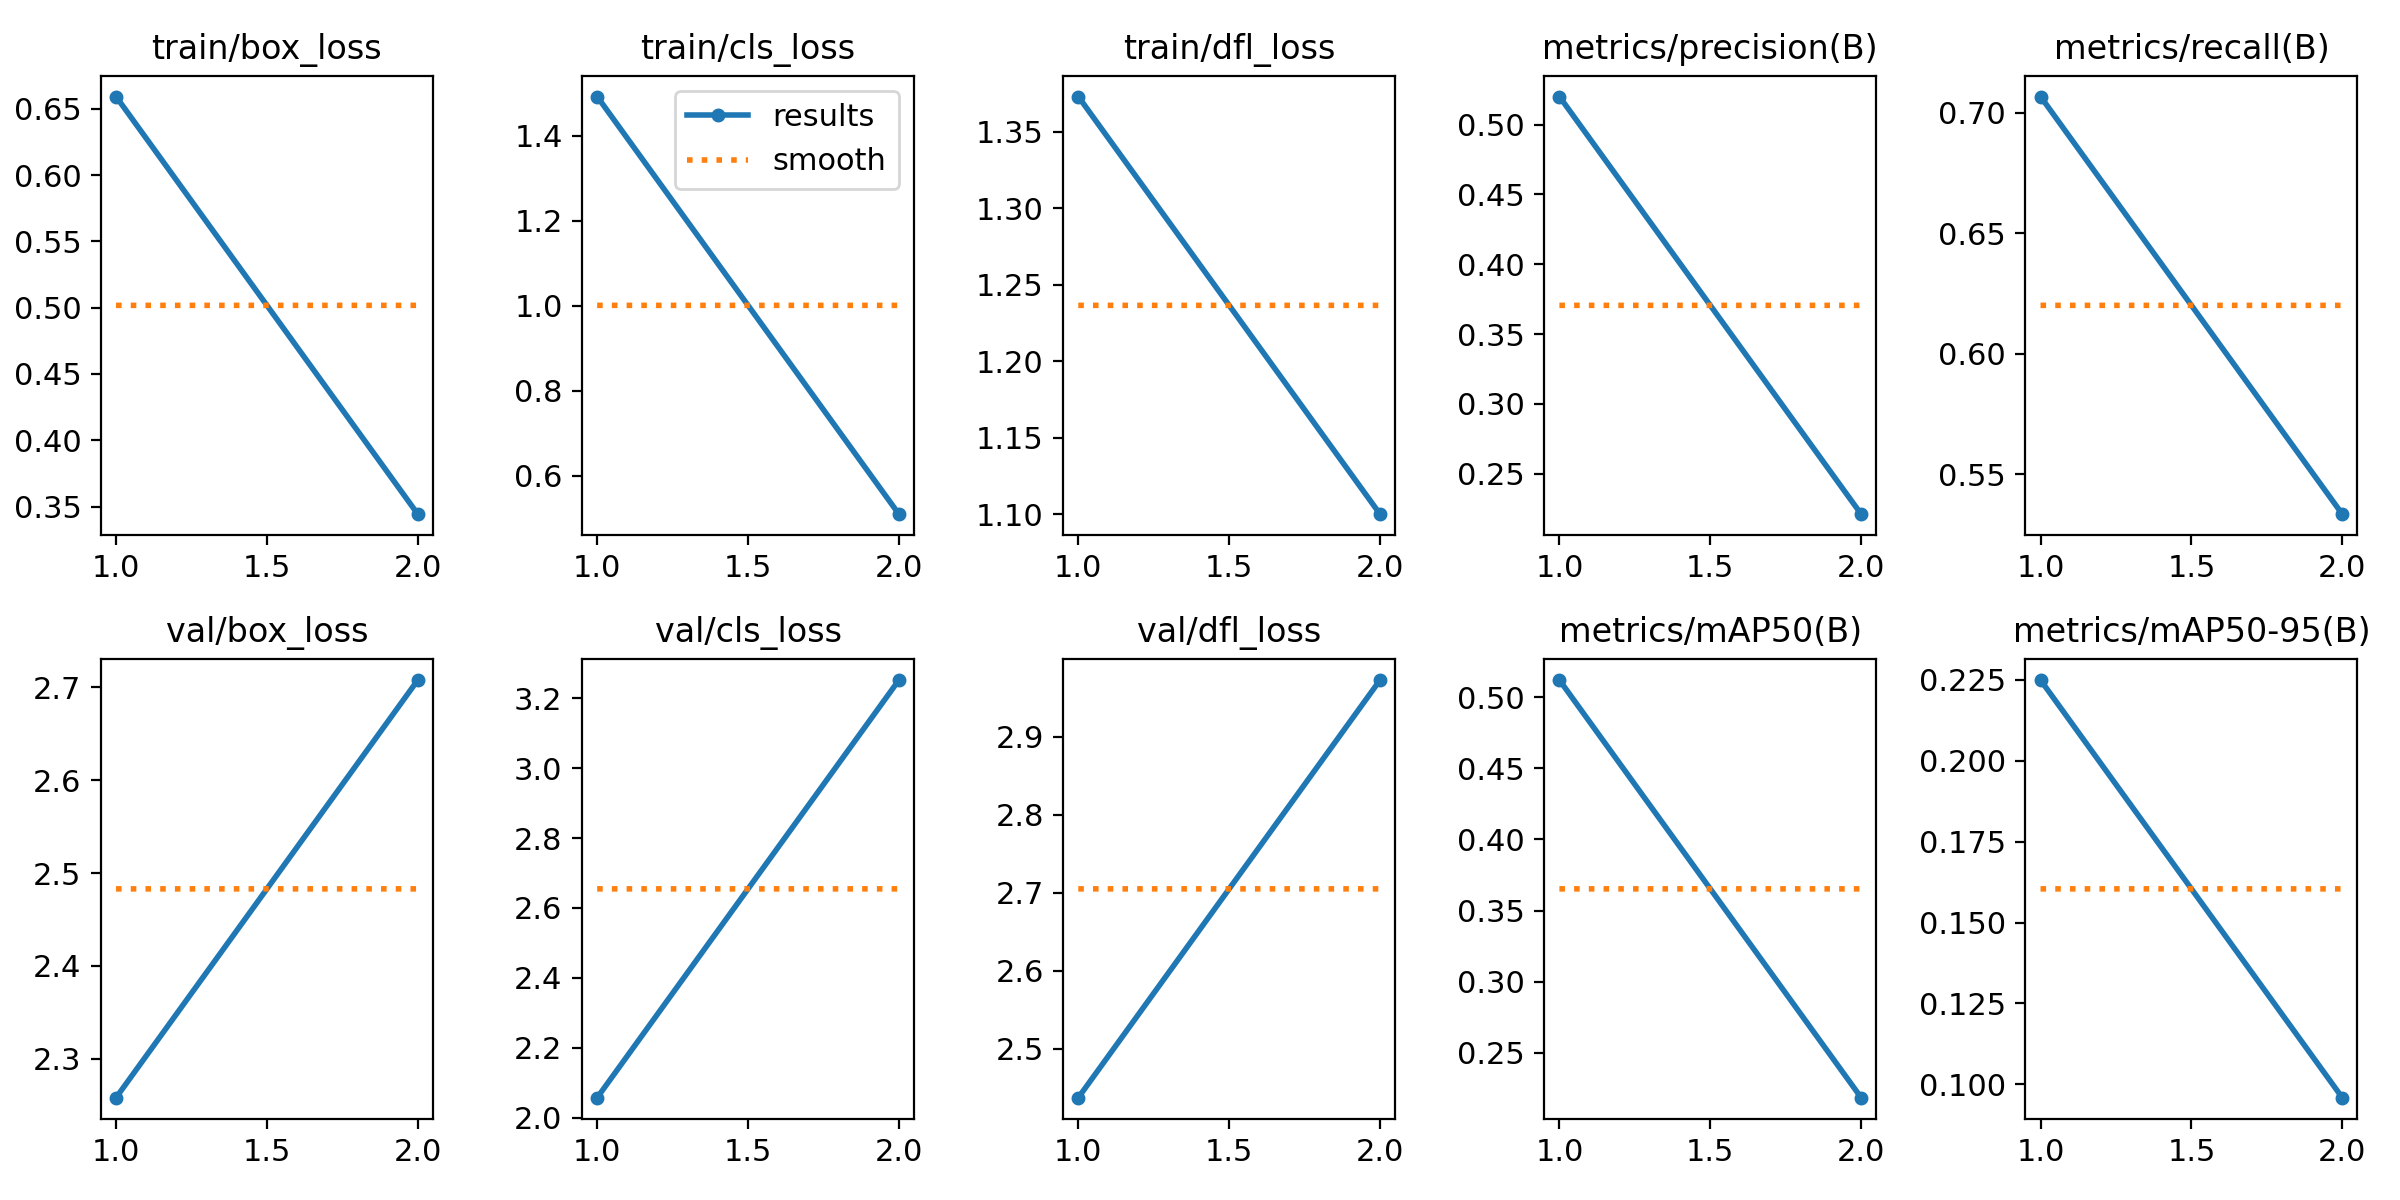

In [7]:
Image(filename=f'runs/detect/train/results.png', width=600)

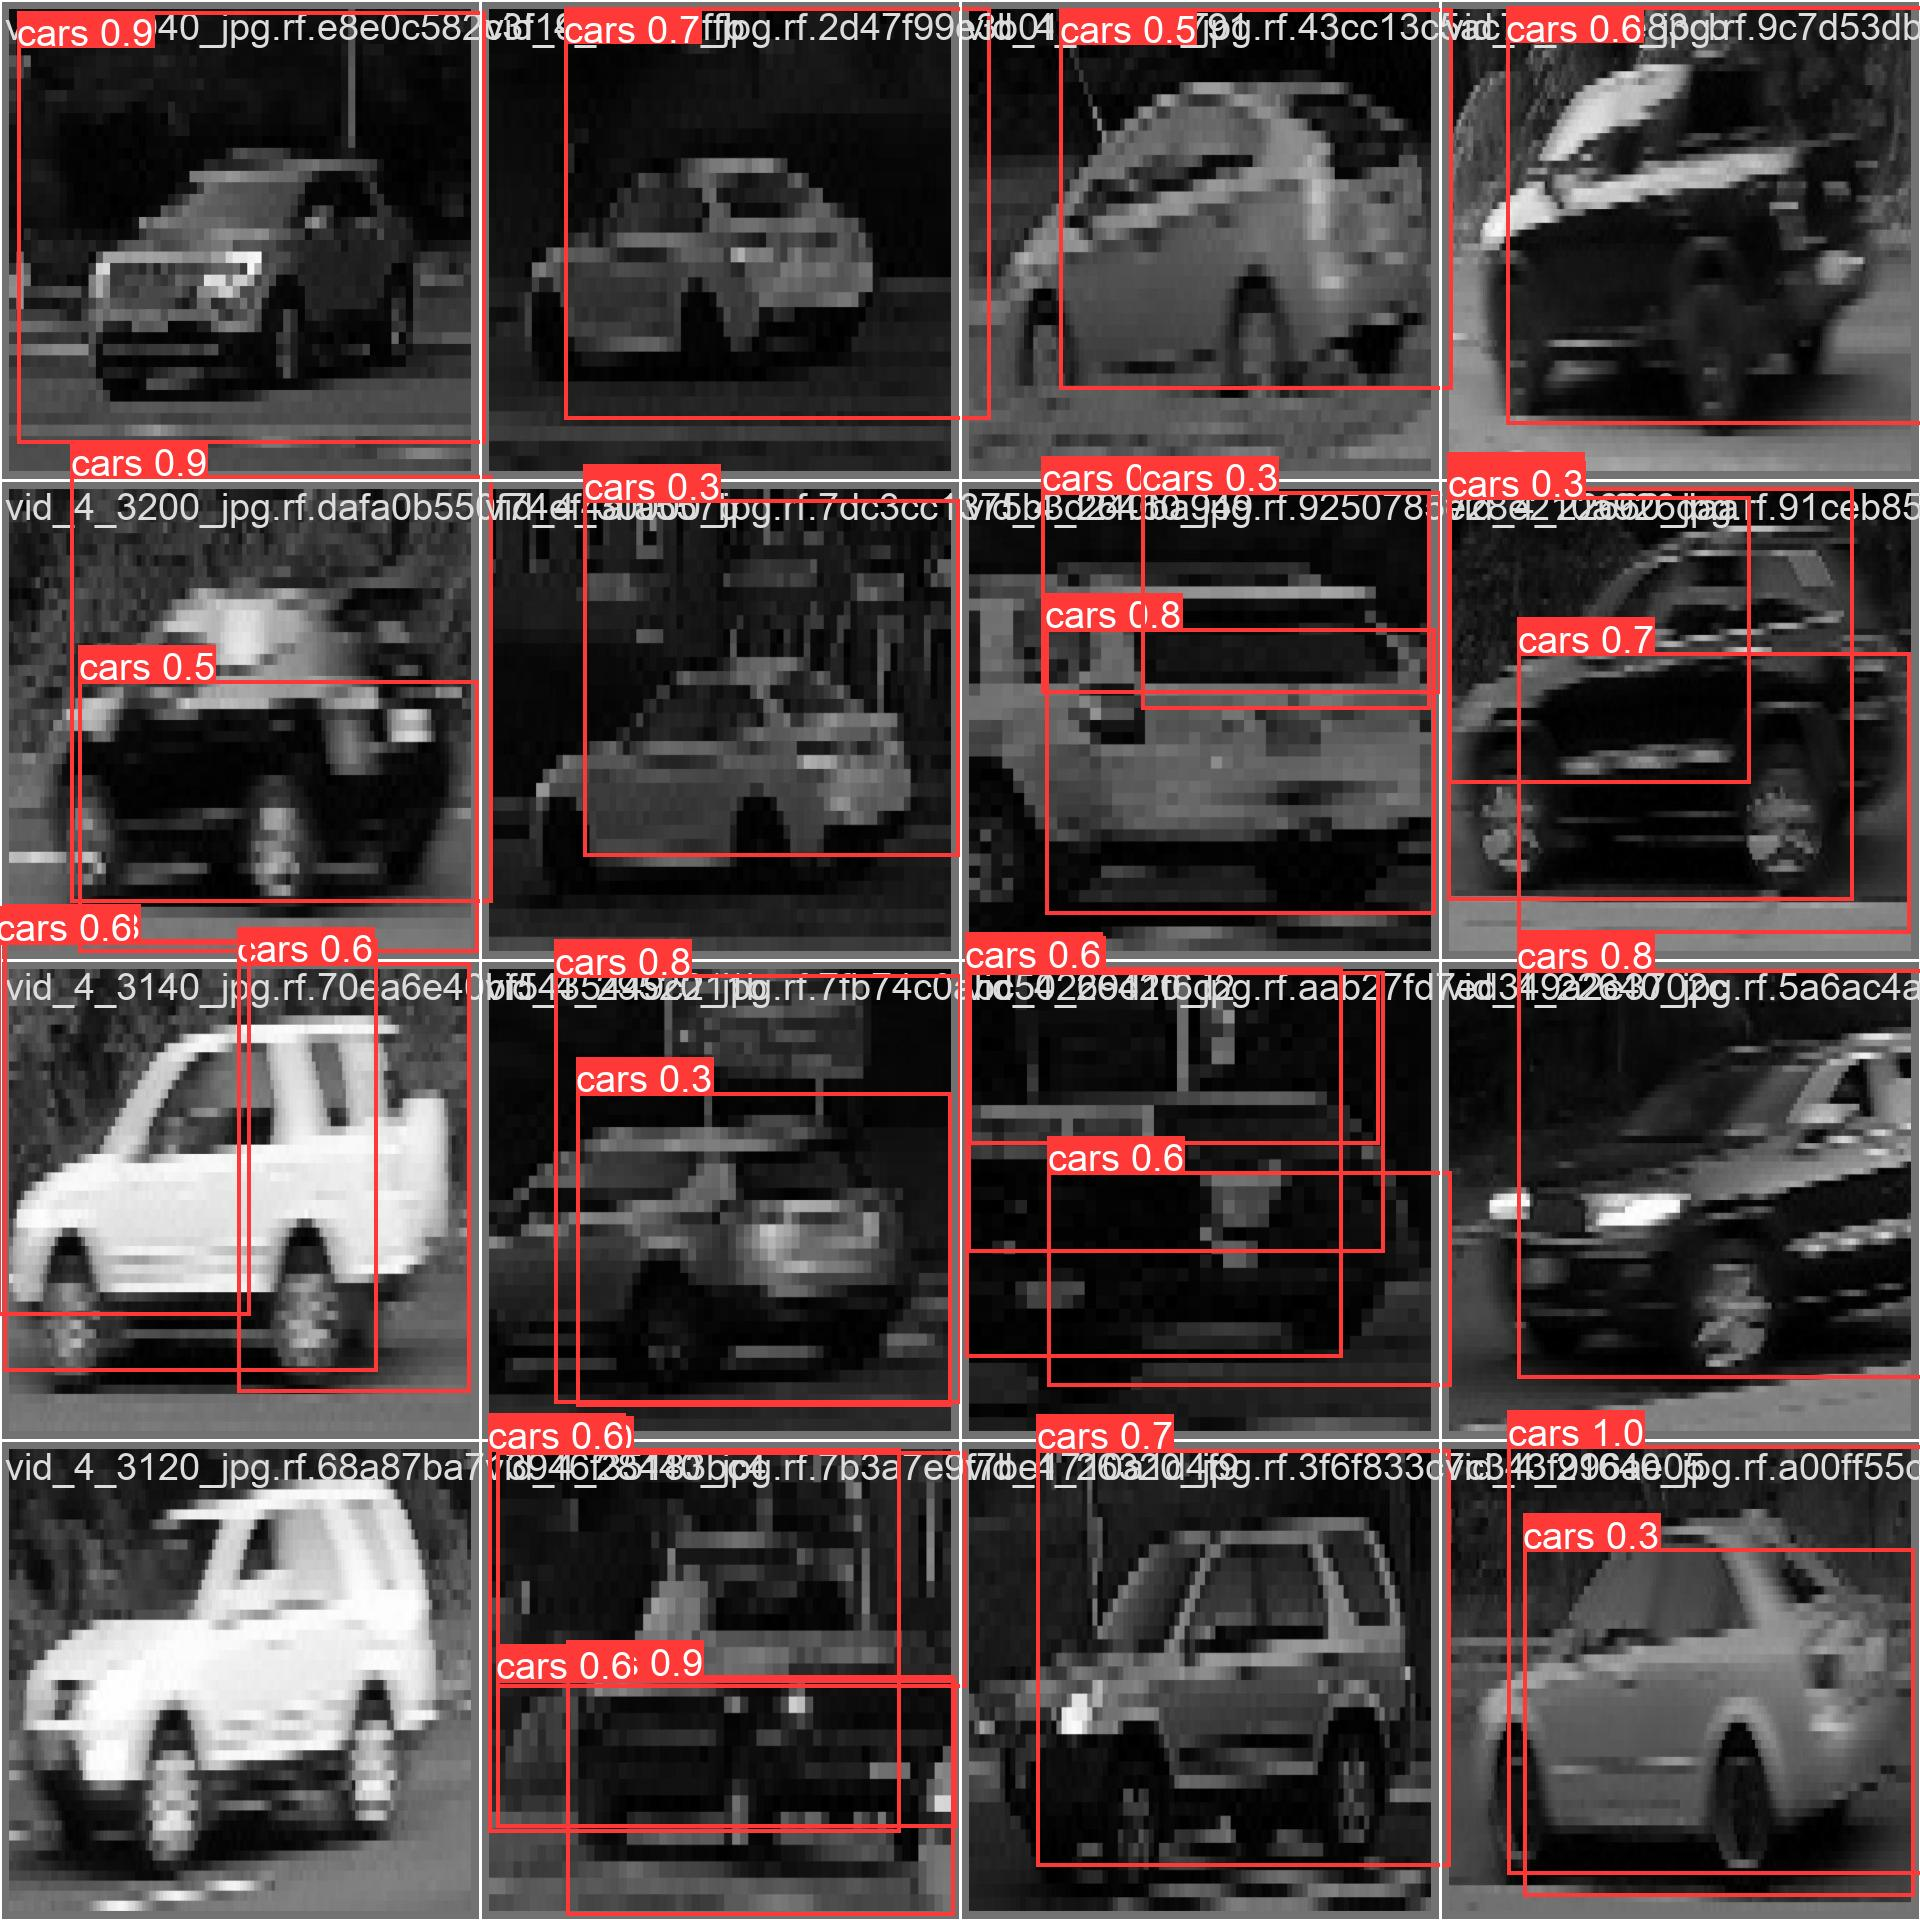

In [8]:
Image(filename=f'runs/detect/train/val_batch0_pred.jpg', width=600)

# Validate Custom Model

In [9]:
!yolo task=detect mode=val model={current_directory}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196  Python-3.10.13 torch-2.1.2+cpu CPU (12th Gen Intel Core(TM) i5-1235U)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

val: Scanning C:\Users\josec\Documents\cuenca_lerma_cv\lab\Car-Object-Detection-2\valid\labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|##########| 75/75 [00:00<?, ?it/s]
val: Scanning C:\Users\josec\Documents\cuenca_lerma_cv\lab\Car-Object-Detection-2\valid\labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|##########| 75/75 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  20%|##        | 1/5 [00:26<01:47, 26.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  40%|####      | 2/5 [00:53<01:20, 26.79s/it]
                 Class     Images  Instances      Box(P    

# Inference with Custom Model

In [10]:
!yolo task=detect mode=predict model={current_directory}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.196  Python-3.10.13 torch-2.1.2+cpu CPU (12th Gen Intel Core(TM) i5-1235U)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/39 C:\Users\josec\Documents\cuenca_lerma_cv\lab\Car-Object-Detection-2\test\images\vid_4_10100_jpg.rf.a3243ff79d2c076709f301bff60530cd.jpg: 800x800 1 cars, 449.1ms
image 2/39 C:\Users\josec\Documents\cuenca_lerma_cv\lab\Car-Object-Detection-2\test\images\vid_4_10120_jpg.rf.d40215d6113775e1a3a2cb6d4c4062b8.jpg: 800x800 1 cars, 503.6ms
image 3/39 C:\Users\josec\Documents\cuenca_lerma_cv\lab\Car-Object-Detection-2\test\images\vid_4_11020_jpg.rf.eb15adf80287347dc6e9ac6660f10041.jpg: 800x800 (no detections), 445.7ms
image 4/39 C:\Users\josec\Documents\cuenca_lerma_cv\lab\Car-Object-Detection-2\test\images\vid_4_12140_jpg.rf.235b020922247b4778961f9956632cda.jpg: 800x800 (no detections), 472.4ms
image 5/39 C:\Users\josec\Documents\cuenca_lerma_cv\lab\Car-Object-Detection-2\test\images\vid_4_13860_jpg.rf.2e46d9

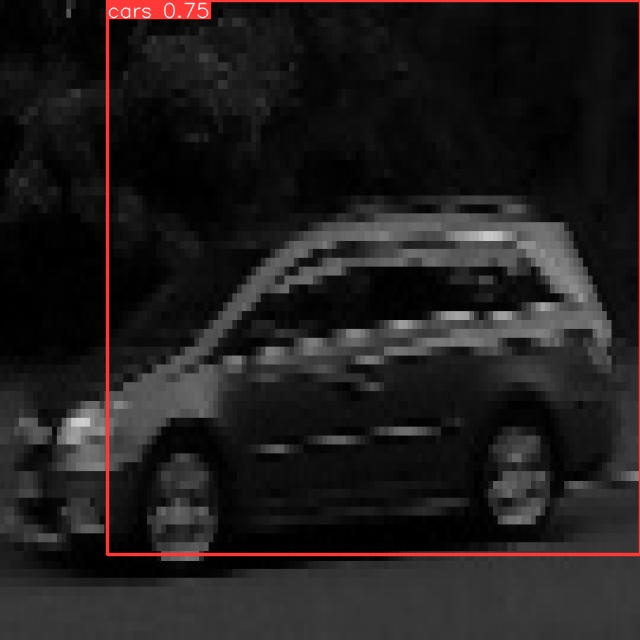

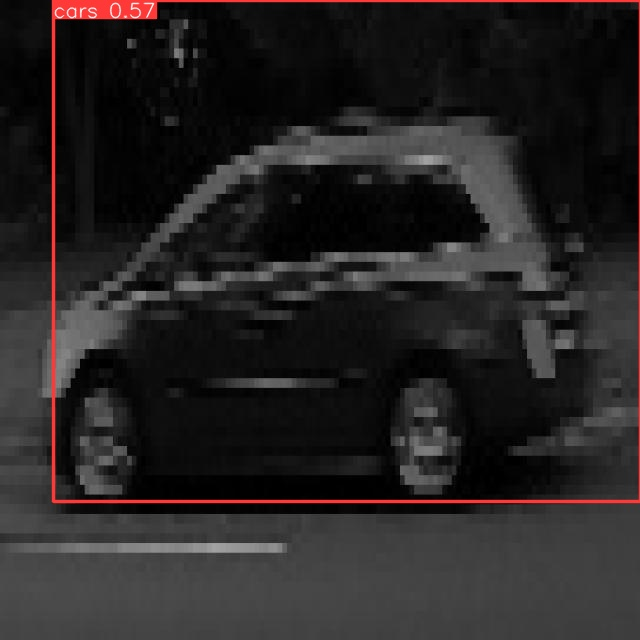

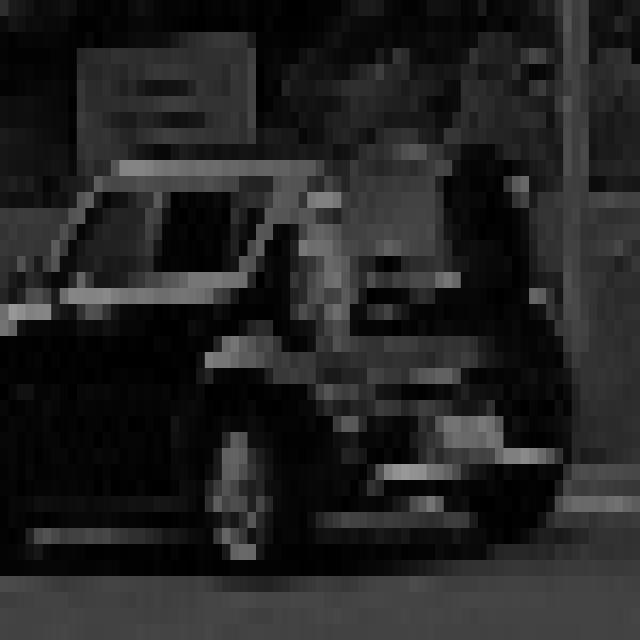

In [11]:
for image_path in glob.glob(f'{current_directory}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

# Deploy Model

In [12]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{current_directory}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/cv-ukshr/car-object-detection-8v1yi/2
Share your model with the world at: https://universe.roboflow.com/cv-ukshr/car-object-detection-8v1yi/model/2


In [16]:
#load model
model = project.version(dataset.version).model

#test_set_loc = dataset.location + "/test/images/"
test_set_loc = f"{current_directory}/data/testing_images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on vid_5_31520.jpg


{'predictions': [{'x': 79,
   'y': 38,
   'width': 158,
   'height': 77,
   'confidence': 0.9999979734420776,
   'class': 'cars',
   'class_id': 0,
   'image_path': 'C:\\Users\\josec\\Documents\\cuenca_lerma_cv\\lab/data/testing_images/vid_5_31520.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 338,
   'y': 299,
   'width': 676,
   'height': 160,
   'confidence': 0.953985333442688,
   'class': 'cars',
   'class_id': 0,
   'image_path': 'C:\\Users\\josec\\Documents\\cuenca_lerma_cv\\lab/data/testing_images/vid_5_31520.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 336,
   'y': 112,
   'width': 672,
   'height': 225,
   'confidence': 0.843821108341217,
   'class': 'cars',
   'class_id': 0,
   'image_path': 'C:\\Users\\josec\\Documents\\cuenca_lerma_cv\\lab/data/testing_images/vid_5_31520.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '676', 'height': '380'}}

# Testing with other images

In [14]:
#load model
model = project.version(dataset.version).model

test_set_loc = f"{current_directory}/data/real_images/"
random_test_image = os.listdir(test_set_loc)[0]
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on 4_autos.jpeg


{'predictions': [{'x': 800,
   'y': 555,
   'width': 1600,
   'height': 675,
   'confidence': 0.5124667286872864,
   'class': 'cars',
   'class_id': 0,
   'image_path': 'C:\\Users\\josec\\Documents\\cuenca_lerma_cv\\lab/data/real_images/4_autos.jpeg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '1600', 'height': '900'}}